In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os

## Poshmark Data Analytics: EDA

This project aims to explore what's selling on poshmark, sell-through rates for specific products, and the best brands and products to source for resellers on Poshmark. Data was ethically sourced through web-scraping on Poshmark with a script that follows the site's scraping guidlines outlined in the **Robots.txt** file.

The data contains information about sold listings on Poshmark. I chose a few categories to scrape and do analyses on instead of selecting from all sold listings on Poshmark, as I wanted to focus on Women's clothing and exclude home and makeup items from the analysis. The categories are: tops, dresses, bags, jeans and skirts.

*For privacy protection, my scraping script is located in a separate directory, and I will remove usernames and the links to specific products from the dataframes before analyses; these columns were used as primary keys to identify unique listings but are not necessary for the data analysis.*

### 1. Opening the Files

In [124]:
tops = pd.read_csv(os.path.expanduser('~/Desktop/poshmark-scraper/listings-tops.csv'))

In [125]:
tops = tops.drop(columns = ['link','user'])

In [126]:
tops

,name,sold price,original price,post_date,size,brand,categories,color(s),sold date,nwt,boutique
0,PLUS WASHED SHORT SLEEVE TOP WITH POCKETS 1 XL,$15,NaN,2025-04-26,1X,Zenana Outfitters,"['Women', 'Tops']","['Green', 'Blue']",05-28-2025,0.0,NaN
1,871. Hem & Thread Striped Navy & White Ruched ...,$25,$32,2025-03-17,M,Hem & Thread,"['Women', 'Tops']","['Blue', 'White']",05-28-2025,1.0,NaN
2,Rumored East End Top In Electric Begonia,$60,$68,2024-11-08,S,Rumored,"['Women', 'Tops']",['Red'],05-28-2025,0.0,NaN
3,Lotus 🪷 Flower Graphic Sleeveless tee shirt si...,$25,NaN,2025-05-16,XL,NaN,"['Women', 'Tops']",[],05-28-2025,0.0,NaN
4,EDDIE BAUER Departure Shirt White XXL Button-u...,$18,$59,2025-05-07,XXL,Eddie Bauer,"['Women', 'Tops']",['Green'],05-28-2025,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9265,Disney by Freeze Minnie Mouse Embroidered Shirt,$14,$14,2025-04-26,S,Disney,['tops'],['red'],06-03-2025,1.0,0.0
9266,Rag and Bone Zoe Deep V Neck tank,$25,$155,2023-01-15,XS,rag & bone,['tops'],['tan'],06-03-2025,1.0,0.0
9267,Vintage Abercrombie & Fitch White Ribbed Fitte...,$19,$38,2025-05-05,S,Abercrombie & Fitch,['tops'],"['tan', 'white']",06-03-2025,0.0,0.0
9268,Pierce The veil tank top red Pierce The Veil b...,$28,$40,2024-12-06,XS,NaN,['tops'],"['red', 'tan']",06-03-2025,1.0,0.0


### 2. Data Description

Columns:

1. **name**: The name of the listing as it appears on the listing's title.

2. **sold price**: The price the item sold for on Poshmark.

3. **original price**: The price the seller indicated was the original retail price of the item. 
    -- *Limitations:* This information may be inaccurate as it is user-provided, and some listings do not specify an original price.

4. **post_date**: The date the listing was sold to a buyer.

5. **size**: Size of the garmet if applicable.

6. **brand**: Brand of the garmet if applicable.

7. **categories**: Categories of the item.

8. **color(s)**: Colors of the item as outlined in the name. 
    -- *Limitations:* The color is only added to this list if there are mentions of a color in the name.

9. **sold_date**: The inferred sold date of the listing.
    -- *Limitations:* The sold date is inferred based on when the listing was added to the recently sold items page.

10. **nwt**: Whether an item is "New with Tags". 

11. **boutique**: Whether an item was sold from a Boutique, which is a shop that resells clothing sourced from wholesalers rather than used clothing or clothing sourced elsewhere.

In [53]:
tops.columns

Index(['name', 'sold price', 'original price', 'post_date', 'size', 'brand',
       'categories', 'color(s)', 'sold date', 'nwt', 'boutique'],
      dtype='object')

### 3. Data Cleaning

Cleaning Tasks:
* Convert numeric columns to correct datatypes.
* Explode the color column for color analyses.
* Convert dates to datetime objects.

In [54]:
tops['sold price'] = tops['sold price'].str.replace(',','').str.strip('$').astype('Int64')
tops['original price'] = tops['original price'].str.replace(',','').str.strip('$').astype('Int64') 

In [72]:
tops['sold date'] = pd.to_datetime(tops['sold date'], format='%m-%d-%Y', errors='coerce')
tops['post_date'] = pd.to_datetime(tops['post_date'], format='%Y-%m-%d', errors='coerce')

In [73]:
tops.head(5)

,name,sold price,original price,post_date,size,brand,categories,color(s),sold date,nwt,boutique
0,PLUS WASHED SHORT SLEEVE TOP WITH POCKETS 1 XL,15,<NA>,2025-04-26,1X,Zenana Outfitters,"['Women', 'Tops']","['Green', 'Blue']",2025-05-28,0.0,NaN
1,Industry Womens Striped Embroidered Eyelet Sh...,30,39,2025-05-14,M,Industry,"['Women', 'Tops']",['White'],2025-05-28,0.0,NaN
2,Grayson Threads Star Stripes Cocktails T-Shirt,7,999,2021-03-20,M,Grayson Threads,"['Women', 'Tops']",['Gray'],2025-05-28,0.0,NaN
3,Brown / white mesh short sleeve stretchy top,25,50,2025-01-11,M,NaN,"['Women', 'Tops']","['Brown', 'White']",2025-05-28,0.0,NaN
4,Quince Women's 100% European Linen Fitted Tank...,23,39,2025-05-28,XS,Quince,"['Women', 'Tops']",['White'],2025-05-28,0.0,NaN


## 4. Top Performing Brands

In [58]:
# top 10 brands by number of sold listings
top_brands = tops['brand'].value_counts().head(12).index
popular_brand_df = tops[tops['brand'].isin(top_brands)]

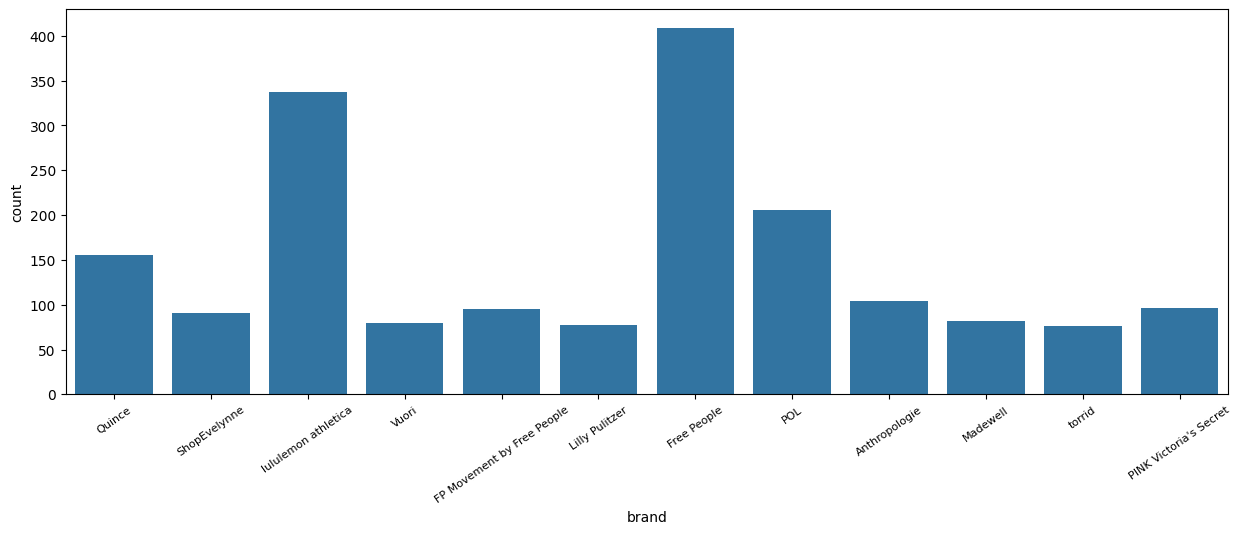

In [68]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=35, fontsize=8)

ax = sns.countplot(data=popular_brand_df, x='brand')

### 5. Brands with Quickest Sell-through Rate

In [81]:
tops['days to sell'] = (tops['sold date'] - tops['post_date']).dt.days

In [113]:
brand_counts = tops['brand'].value_counts()
brands_over_20 = brand_counts[brand_counts > 20].index

tops_filtered = tops[tops['brand'].isin(brands_over_20)].sort_values(by='days to sell', ascending=True)

fastest_brands = tops_filtered.groupby('brand')['days to sell'].agg('mean').sort_values(ascending=True).reset_index()

/var/folders/cs/7l_bb9h90p34cr9nb01v985h0000gn/T/ipykernel_45277/3144580522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_fastest, x='days to sell', y='brand', palette='viridis')


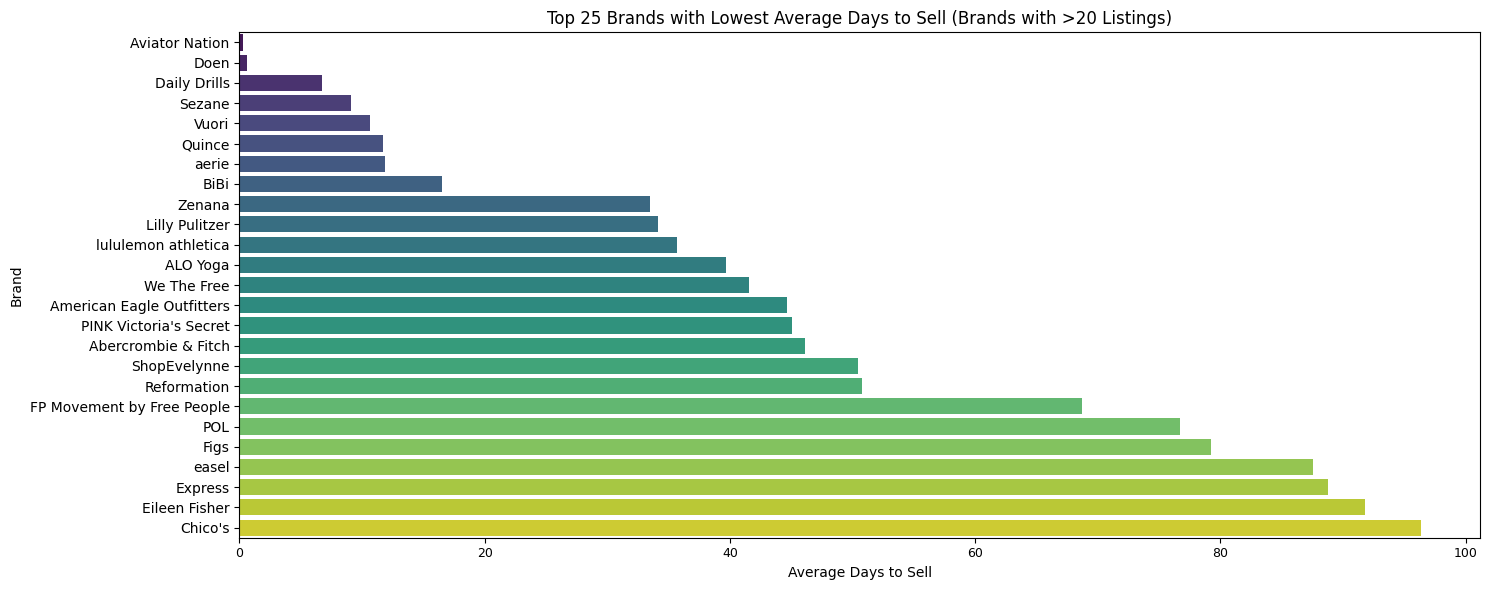

In [123]:
top_25_fastest = fastest_brands[:25]

plt.figure(figsize=(15, 6))
sns.barplot(data=top_25_fastest, x='days to sell', y='brand', palette='viridis')

plt.title('Top 25 Brands with Lowest Average Days to Sell (Brands with >20 Listings)')
plt.xlabel('Average Days to Sell')
plt.xticks(fontsize=9)
plt.ylabel('Brand')

plt.tight_layout()
plt.show()

<Axes: ylabel='days to sell'>

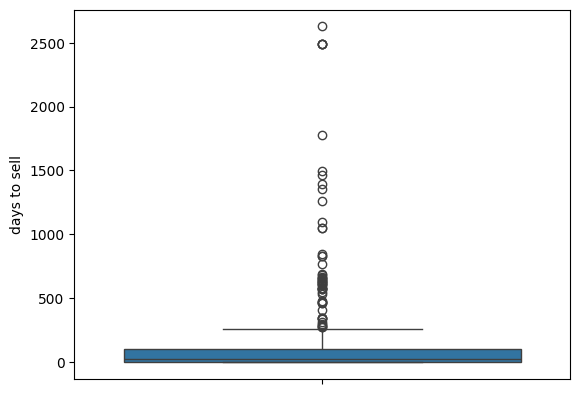

In [133]:
sns.boxplot(tops_filtered[tops_filtered['brand'] == 'Free People']['days to sell'])

In [136]:
tops_filtered[tops_filtered['brand'] == 'lululemon athletica'].sort_values(by='days to sell', ascending=False)

,name,sold price,original price,post_date,size,brand,categories,color(s),sold date,nwt,boutique,days to sell
678,NEW Lululemon High Neck Run and Train Tank in ...,36,48,2021-09-09,4,lululemon athletica,"['Women', 'Tops']","['Yellow', 'Gold']",2025-05-28,0.0,NaN,1357
7381,Lot of 4 Womens Cool Racerback Lululemon Tanks,40,60,2021-12-29,6,lululemon athletica,['tops'],['tan'],2025-06-02,0.0,0.0,1251
1931,Lululemon Run Red White Striped Fast Track Tan...,25,<NA>,2023-07-03,4,lululemon athletica,['tops'],"['red', 'tan', 'white']",2025-05-30,0.0,0.0,697
6689,Lululemon Power Pivot Tank * Embossed Lululemon,46,<NA>,2023-10-13,4,lululemon athletica,['tops'],['tan'],2025-06-01,1.0,0.0,597
2902,Lululemon Double-Strap Yoga Tank Top Black Siz...,38,<NA>,2023-10-28,4,lululemon athletica,['tops'],"['tan', 'white', 'black']",2025-05-30,1.0,0.0,580
...,...,...,...,...,...,...,...,...,...,...,...,...
563,Lululemon black racer back active tank,25,60,2025-05-28,2,lululemon athletica,"['Women', 'Tops']",['Black'],2025-05-28,0.0,NaN,0
5358,NWOT-Lululemon Black Tank Top size 8,28,68,2025-06-01,8,lululemon athletica,['tops'],"['tan', 'black']",2025-06-01,0.0,0.0,0
8884,Lululemon Athletica Gray Long Sleeve Fitted Cr...,15,68,2025-06-02,6,lululemon athletica,['tops'],['gray'],2025-06-02,0.0,0.0,0
9184,lululemon athletica Pink Tank Top,12,<NA>,2025-06-02,16,lululemon athletica,['tops'],"['pink', 'tan']",2025-06-02,0.0,0.0,0
